In [1]:
#pip install kagglehub

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

### Extracting the dataset from Kaggle and save it locally 

In [4]:
# Extract latest version of cities housing market dataset from Kaggle 
path = kagglehub.dataset_download("vincentvaseghi/us-cities-housing-market-data")
# print the path to locate the file directory
print("Path to dataset files:", path)

Path to dataset files: C:\Users\JAndr\.cache\kagglehub\datasets\vincentvaseghi\us-cities-housing-market-data\versions\33


In [5]:
# Set the correct path to the directory
directory_path =  "\\Users\\JAndr\\.cache\\kagglehub\\datasets\\vincentvaseghi\\us-cities-housing-market-data\\versions\\33"

# check the files under the directory which the dataset is downloaded 
print("Files in the directory:", os.listdir(directory_path))

Files in the directory: ['city_market_tracker.tsv000']


In [6]:
# combine the directory path and the dataset file in to a single file path 
file_path = os.path.join(directory_path, 'city_market_tracker.tsv000')

# Open the TSV file using panda dataframe 
df = pd.read_csv(file_path, sep='\t')

# Display the first 5 rows of the dataset
df.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2016-07-01,2016-07-31,30,place,6,9989,f,"Liberty Lake, WA",Liberty Lake,Washington,...,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Spokane, WA",44060,2025-01-13 14:16:48
1,2014-01-01,2014-01-31,30,place,6,5334,f,"Edgewood, WA",Edgewood,Washington,...,0.714286,0.264706,0.204100,0.178992,0.222222,0.222222,0.055556,"Tacoma, WA",45104,2025-01-13 14:16:48
2,2019-04-01,2019-04-30,30,place,6,26576,f,"White Meadow Lake, NJ",White Meadow Lake,New Jersey,...,-0.100000,0.290323,0.118894,0.132428,0.000000,0.000000,0.000000,"Newark, NJ",35084,2025-01-13 14:16:48
3,2017-04-01,2017-04-30,30,place,6,5544,f,"Englewood, NJ",Englewood,New Jersey,...,0.086957,0.165803,-0.035255,-0.034197,0.138889,0.069923,0.098889,"New York, NY",35614,2025-01-13 14:16:48
4,2020-07-01,2020-07-31,30,place,6,21435,f,"Belvedere, SC",Belvedere,South Carolina,...,0.750000,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Augusta, GA",12260,2025-01-13 14:16:48


In [7]:
num_rows = len(df)
print(f"Number of Rows: {num_rows}")

Number of Rows: 5708042


### Transforming the data

In [9]:
# Extracting NC, Virginia, Texas data 
filtered_df = df[df['state'].isin(['North Carolina', 'Texas', 'Virginia'])]

# Display the first 5 rows of the filtered data
filtered_df.head(10)


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
5,2024-04-01,2024-04-30,30,place,6,8805,f,"Holiday Lakes, TX",Holiday Lakes,Texas,...,NaN,0.333333,NaN,NaN,0.000000,NaN,NaN,"Houston, TX",26420,2025-01-13 14:16:48
12,2024-05-01,2024-05-31,30,place,6,10173,f,"Krugerville, TX",Krugerville,Texas,...,0.023810,0.066667,-0.155556,-0.361905,0.500000,0.333333,0.333333,"Dallas, TX",19124,2025-01-13 14:16:48
25,2024-07-01,2024-07-31,30,place,6,475,f,"Alice, TX",Alice,Texas,...,-0.051948,0.105263,-0.022396,-0.052632,0.333333,0.333333,0.102564,"Alice, TX",10860,2025-01-13 14:16:48
47,2021-04-01,2021-04-30,30,place,6,475,f,"Alice, TX",Alice,Texas,...,0.333333,NaN,NaN,NaN,0.312500,-0.072115,0.312500,"Alice, TX",10860,2025-01-13 14:16:48
55,2013-04-01,2013-04-30,30,place,6,1855,f,"Bedford, TX",Bedford,Texas,...,-0.333333,NaN,NaN,NaN,0.333333,-0.238095,0.333333,"Fort Worth, TX",23104,2025-01-13 14:16:48
58,2013-04-01,2013-04-30,30,place,6,18721,f,"Trent, TX",Trent,Texas,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,"Abilene, TX",10180,2025-01-13 14:16:48
61,2016-06-01,2016-06-30,30,place,6,25346,f,"Pimmit Hills, VA",Pimmit Hills,Virginia,...,0.000000,0.357143,0.090476,0.119048,0.500000,0.277778,0.100000,"Washington, DC",47894,2025-01-13 14:16:48
83,2022-11-01,2022-11-30,30,place,6,19395,f,"Watauga, TX",Watauga,Texas,...,-0.384921,0.393939,-0.223708,0.240093,0.272727,0.009569,-0.314229,"Fort Worth, TX",23104,2025-01-13 14:16:48
93,2017-01-01,2017-01-31,30,place,6,19205,f,"Wrightsville Beach, NC",Wrightsville Beach,North Carolina,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,"Wilmington, NC",48900,2025-01-13 14:16:48
105,2012-07-01,2012-07-31,30,place,6,23438,f,"Inez, TX",Inez,Texas,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,"Victoria, TX",47020,2025-01-13 14:16:48


In [10]:
#filtered_df.dtypes

In [11]:
# Extracting 2015 - 2025 data from period begin and period end columns
# convert the datatype to of columns that have dates to filter the dataset based on years
filtered_df['period_begin'] = pd.to_datetime(filtered_df['period_begin'], errors='coerce')
filtered_df['period_end'] = pd.to_datetime(filtered_df['period_end'], errors='coerce')

# Filter the data from 2020 - 25
covid_years_data = filtered_df[
    (filtered_df['period_begin'].dt.year >= 2015) & 
    (filtered_df['period_end'].dt.year <= 2025)
]
print(covid_years_data.tail())

        period_begin period_end  period_duration region_type  region_type_id  \
5707969   2024-04-01 2024-04-30               30       place               6   
5707986   2015-11-01 2015-11-30               30       place               6   
5708033   2023-05-01 2023-05-31               30       place               6   
5708034   2024-04-01 2024-04-30               30       place               6   
5708039   2024-08-01 2024-08-31               30       place               6   

         table_id is_seasonally_adjusted                    region  \
5707969     23177                      f      Gloucester Point, VA   
5707986     16125                      f              Rockwall, TX   
5708033     13493                      f  North Richland Hills, TX   
5708034      9223                      f            Kure Beach, NC   
5708039     18307                      f            Weddington, NC   

                         city           state  ... sold_above_list_yoy  \
5707969      Gloucester 

C:\Users\JAndr\AppData\Local\Temp\ipykernel_35260\3674895757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['period_begin'] = pd.to_datetime(filtered_df['period_begin'], errors='coerce')
C:\Users\JAndr\AppData\Local\Temp\ipykernel_35260\3674895757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['period_end'] = pd.to_datetime(filtered_df['period_end'], errors='coerce')


In [12]:
# check number of rows 
num_rows = len(covid_years_data)
print(f"Number of Rows: {num_rows}")

Number of Rows: 457513


In [13]:
# Dropping columns that aren't essential for data analysis tbale
covid_years_data = pd.DataFrame(covid_years_data)
drop_columns = [
    'table_id',
    'is_seasonally_adjusted',
    'region_type',
    'region_type_id',
    'property_type',
    'region',
    'state_code',
    'last_updated',
    'period_duration'    
]
covid_years_data = covid_years_data.drop(columns=drop_columns)
print(covid_years_data.head())

   period_begin period_end           city     state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes     Texas                -1   
12   2024-05-01 2024-05-31    Krugerville     Texas                -1   
25   2024-07-01 2024-07-31          Alice     Texas                -1   
47   2021-04-01 2021-04-30          Alice     Texas                -1   
61   2016-06-01 2016-06-30   Pimmit Hills  Virginia                -1   

    median_sale_price  median_sale_price_mom  median_sale_price_yoy  \
5             56000.0                    NaN                    NaN   
12           712000.0               0.514894               0.675373   
25           148000.0              -0.115494              -0.446729   
47           252000.0               1.913295               1.000000   
61           542500.0              -0.473301               0.029412   

    median_list_price  median_list_price_mom  ...  sold_above_list_mom  \
5            119900.0                    NaN  ...           

In [14]:
print(len(covid_years_data.columns))

49


In [15]:
# percentage of mmissing values in the data base:
missing_values = covid_years_data.isna().mean() * 100
missing_values

period_begin                       0.000000
period_end                         0.000000
city                               0.000000
state                              0.000000
property_type_id                   0.000000
median_sale_price                  0.000437
median_sale_price_mom             16.463576
median_sale_price_yoy             17.630974
median_list_price                 14.202657
median_list_price_mom             26.067456
median_list_price_yoy             27.579107
median_ppsf                        0.772000
median_ppsf_mom                   17.203446
median_ppsf_yoy                   18.388767
median_list_ppsf                  14.598055
median_list_ppsf_mom              26.502635
median_list_ppsf_yoy              28.052973
homes_sold                         0.000000
homes_sold_mom                    16.463576
homes_sold_yoy                    17.630537
pending_sales                     10.987666
pending_sales_mom                 24.593837
pending_sales_yoy               

In [16]:
covid_years_data = covid_years_data.drop(columns=["median_sale_price_mom", "median_list_price_mom", "median_ppsf_mom", "median_list_ppsf_mom", "homes_sold_mom",\
                      "pending_sales_mom", "new_listings_mom", "inventory_mom", "months_of_supply_mom", "median_dom_mom",\
                      "avg_sale_to_list_mom", "sold_above_list_mom", "price_drops_mom", "off_market_in_two_weeks_mom"])
covid_years_data.head()

,period_begin,period_end,city,state,property_type_id,median_sale_price,median_sale_price_yoy,median_list_price,median_list_price_yoy,median_ppsf,...,avg_sale_to_list,avg_sale_to_list_yoy,sold_above_list,sold_above_list_yoy,price_drops,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code
5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,NaN,119900.0,NaN,58.577406,...,0.861538,NaN,0.000000,NaN,0.333333,NaN,0.000000,NaN,"Houston, TX",26420
12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,0.675373,675000.0,0.250232,232.662252,...,0.995242,-0.005388,0.166667,0.023810,0.066667,-0.361905,0.500000,0.333333,"Dallas, TX",19124
25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,-0.446729,165000.0,-0.056873,103.496503,...,0.926397,-0.099491,0.090909,-0.051948,0.105263,-0.052632,0.333333,0.102564,"Alice, TX",10860
47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,1.000000,149000.0,0.027586,106.554703,...,0.985631,0.059018,0.333333,0.333333,NaN,NaN,0.312500,0.312500,"Alice, TX",10860
61,2016-06-01,2016-06-30,Pimmit Hills,Virginia,-1,542500.0,0.029412,585000.0,0.109110,354.575163,...,1.039787,0.014498,0.800000,0.000000,0.357143,0.119048,0.500000,0.100000,"Washington, DC",47894


In [17]:
covid_years_data = covid_years_data.drop(columns=["median_sale_price_yoy", "median_list_price_yoy", "median_ppsf_yoy", "median_list_ppsf_yoy", "homes_sold_yoy",\
                      "pending_sales_yoy", "new_listings_yoy", "inventory_yoy", "months_of_supply_yoy", "median_dom_yoy",\
                      "avg_sale_to_list_yoy", "sold_above_list_yoy", "price_drops_yoy", "off_market_in_two_weeks_yoy"])
covid_years_data.head()

,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,...,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code
5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,1.0,...,1.0,3.0,3.0,102.0,0.861538,0.000000,0.333333,0.000000,"Houston, TX",26420
12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,6.0,...,11.0,15.0,2.5,45.0,0.995242,0.166667,0.066667,0.500000,"Dallas, TX",19124
25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,165000.0,103.496503,107.415902,11.0,...,17.0,57.0,5.2,64.0,0.926397,0.090909,0.105263,0.333333,"Alice, TX",10860
47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,6.0,...,15.0,27.0,4.5,102.0,0.985631,0.333333,NaN,0.312500,"Alice, TX",10860
61,2016-06-01,2016-06-30,Pimmit Hills,Virginia,-1,542500.0,585000.0,354.575163,315.618071,5.0,...,16.0,28.0,5.6,5.0,1.039787,0.800000,0.357143,0.500000,"Washington, DC",47894


In [18]:
covid_years_data.head(10)

,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,...,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code
5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,1.0,...,1.0,3.0,3.0,102.0,0.861538,0.000000,0.333333,0.000000,"Houston, TX",26420
12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,6.0,...,11.0,15.0,2.5,45.0,0.995242,0.166667,0.066667,0.500000,"Dallas, TX",19124
25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,165000.0,103.496503,107.415902,11.0,...,17.0,57.0,5.2,64.0,0.926397,0.090909,0.105263,0.333333,"Alice, TX",10860
47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,6.0,...,15.0,27.0,4.5,102.0,0.985631,0.333333,NaN,0.312500,"Alice, TX",10860
61,2016-06-01,2016-06-30,Pimmit Hills,Virginia,-1,542500.0,585000.0,354.575163,315.618071,5.0,...,16.0,28.0,5.6,5.0,1.039787,0.800000,0.357143,0.500000,"Washington, DC",47894
83,2022-11-01,2022-11-30,Watauga,Texas,-1,284000.0,299900.0,199.408470,188.335358,18.0,...,19.0,33.0,1.8,39.0,0.984357,0.222222,0.393939,0.272727,"Fort Worth, TX",23104
93,2017-01-01,2017-01-31,Wrightsville Beach,North Carolina,13,775000.0,NaN,420.281996,NaN,3.0,...,NaN,4.0,1.3,97.0,0.945144,0.000000,NaN,0.000000,"Wilmington, NC",48900
111,2015-03-01,2015-03-31,New Berlin,Texas,6,383200.0,NaN,183.524904,NaN,1.0,...,NaN,NaN,NaN,193.0,0.988903,0.000000,NaN,NaN,"San Antonio, TX",41700
130,2024-07-01,2024-07-31,Boswell's Corner,Virginia,-1,343500.0,NaN,171.848706,NaN,2.0,...,NaN,NaN,NaN,36.0,1.011111,0.500000,NaN,NaN,"Washington, DC",47894
133,2020-02-01,2020-02-29,Carolina Beach,North Carolina,6,400000.0,392000.0,209.314495,280.095699,7.0,...,12.0,54.0,7.7,81.0,0.954115,0.000000,NaN,0.000000,"Wilmington, NC",48900


In [19]:
# percentage of mmissing values in the data base:
missing_values = covid_years_data.isna().mean() * 100
missing_values

period_begin                       0.000000
period_end                         0.000000
city                               0.000000
state                              0.000000
property_type_id                   0.000000
median_sale_price                  0.000437
median_list_price                 14.202657
median_ppsf                        0.772000
median_list_ppsf                  14.598055
homes_sold                         0.000000
pending_sales                     10.987666
new_listings                      14.184734
inventory                          5.873931
months_of_supply                   5.873931
median_dom                         0.734187
avg_sale_to_list                   8.584456
sold_above_list                    0.000000
price_drops                       41.474887
off_market_in_two_weeks            7.396948
parent_metro_region                0.000000
parent_metro_region_metro_code     0.000000
dtype: float64

In [21]:
# drop columns where more than 30% of values are missing 
threshold = 0.3
covid_years_data = covid_years_data.dropna(axis=1, thresh=len(covid_years_data) * (1 - threshold))
print(covid_years_data.shape)

(457513, 20)


In [23]:
covid_years_data.head()

,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code
5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,1.0,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000,"Houston, TX",26420
12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,6.0,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000,"Dallas, TX",19124
25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,165000.0,103.496503,107.415902,11.0,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333,"Alice, TX",10860
47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,6.0,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500,"Alice, TX",10860
61,2016-06-01,2016-06-30,Pimmit Hills,Virginia,-1,542500.0,585000.0,354.575163,315.618071,5.0,8.0,16.0,28.0,5.6,5.0,1.039787,0.800000,0.500000,"Washington, DC",47894


In [25]:
# Select relevant columns (adjust column names as needed)
price_column = 'median_sale_price'  # Adjust if necessary
region_column = 'parent_metro_region'  # Adjust if necessary

In [27]:
# Ensure we have the required columns
if price_column in covid_years_data.columns and region_column in covid_years_data.columns:
    # Calculate the price growth for each city
    price_growth = covid_years_data.groupby(region_column)[price_column].agg(['first', 'last'])
    price_growth['growth_percent'] = ((price_growth['last'] - price_growth['first']) / price_growth['first']) * 100

    # Sort by highest growth
    fastest_growing_cities = price_growth.sort_values(by='growth_percent', ascending=False)
    # Display the top 10 fastest-growing cities
    print(fastest_growing_cities.head(10))
else:
    print("Error: Required columns not found in the dataset. Check column names.")

                        first       last  growth_percent
parent_metro_region                                     
Rocky Mount, NC       10000.0   184000.0     1740.000000
New Bern, NC          27000.0   230000.0      751.851852
Gainesville, TX       64999.0   517625.0      696.358406
Odessa, TX            37000.0   269300.0      627.837838
Charlotte, NC        145500.0   998750.0      586.426117
Houston, TX           56000.0   380000.0      578.571429
Granbury, TX         274900.0  1650000.0      500.218261
Big Stone Gap, VA     16196.0    91450.0      464.645592
Kingsville, TX        25000.0   131575.0      426.300000
Boone, NC            165500.0   750000.0      353.172205


In [29]:
# Select the top 10 fastest-growing cities
top_cities = fastest_growing_cities.head(10)

C:\Users\JAndr\AppData\Local\Temp\ipykernel_35260\685085580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


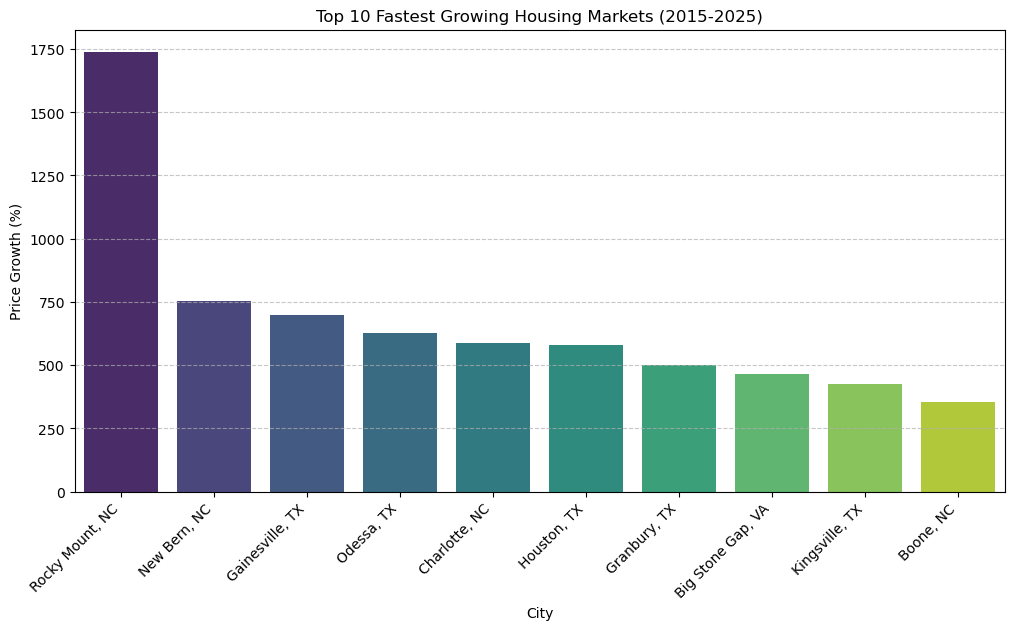

In [31]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_cities.index, 
    y=top_cities['growth_percent'], 
    palette="viridis"
)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Price Growth (%)")
plt.title("Top 10 Fastest Growing Housing Markets (2015-2025)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [33]:
# Extract year from period_begin
covid_years_data['year'] = covid_years_data['period_begin'].dt.year

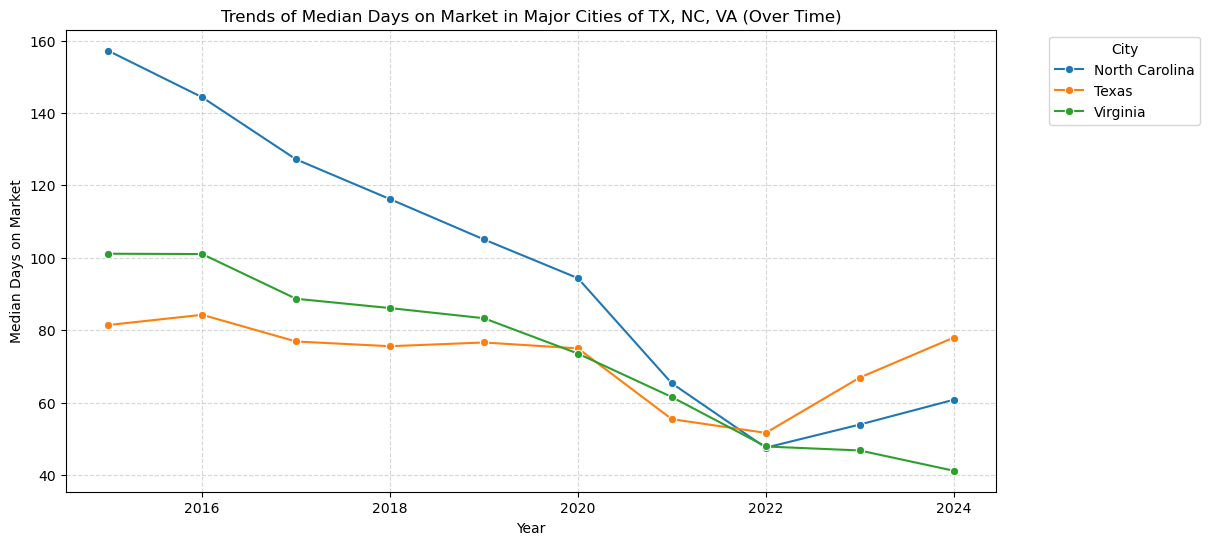

In [51]:
# Check if 'median_dom' and 'region_name' columns exist
if 'median_dom' in covid_years_data.columns and 'state' in filtered_df.columns:
    
    # Group by year and city, then calculate average Median_DOM
    df_grouped = covid_years_data.groupby(['year', 'state'])['median_dom'].mean().reset_index()

    # Select major cities (top 5 per state by lowest Median_DOM)
    major_cities = df_grouped.groupby('state')['median_dom'].mean().nsmallest(15).index
    df_major_cities = df_grouped[df_grouped['state'].isin(major_cities)]

    # Plot the trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_major_cities, 
        x='year', 
        y='median_dom', 
        hue='state', 
        marker='o', 
        palette='tab10'
    )

    # Formatting
    plt.xlabel("Year")
    plt.ylabel("Median Days on Market")
    plt.title("Trends of Median Days on Market in Major Cities of TX, NC, VA (Over Time)")
    plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

else:
    print("Error: 'median_dom' or 'region_name' column not found in the dataset. Check column names.")

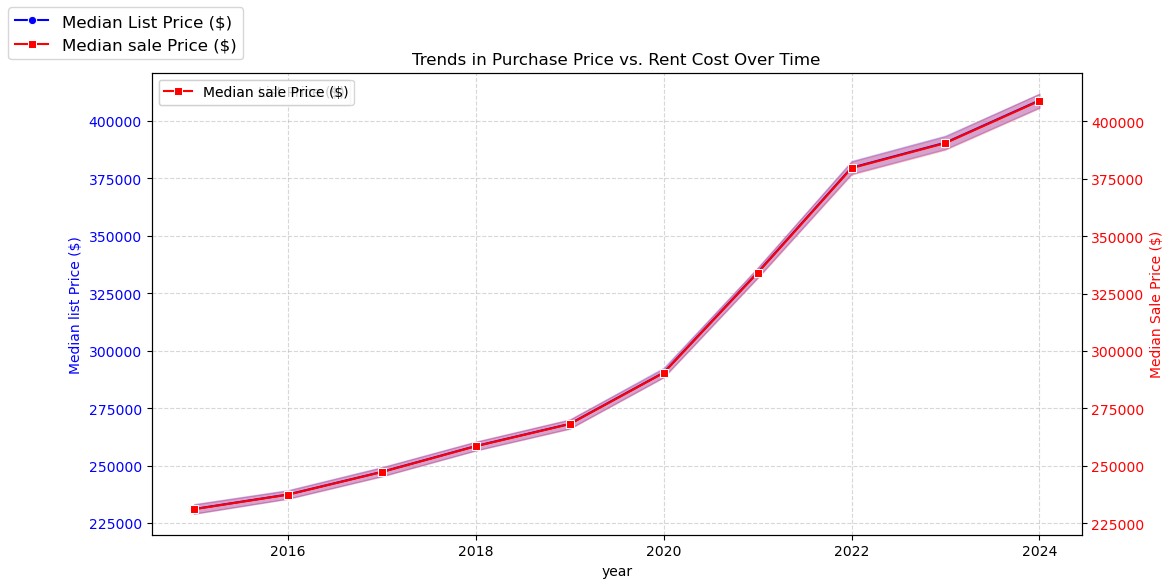

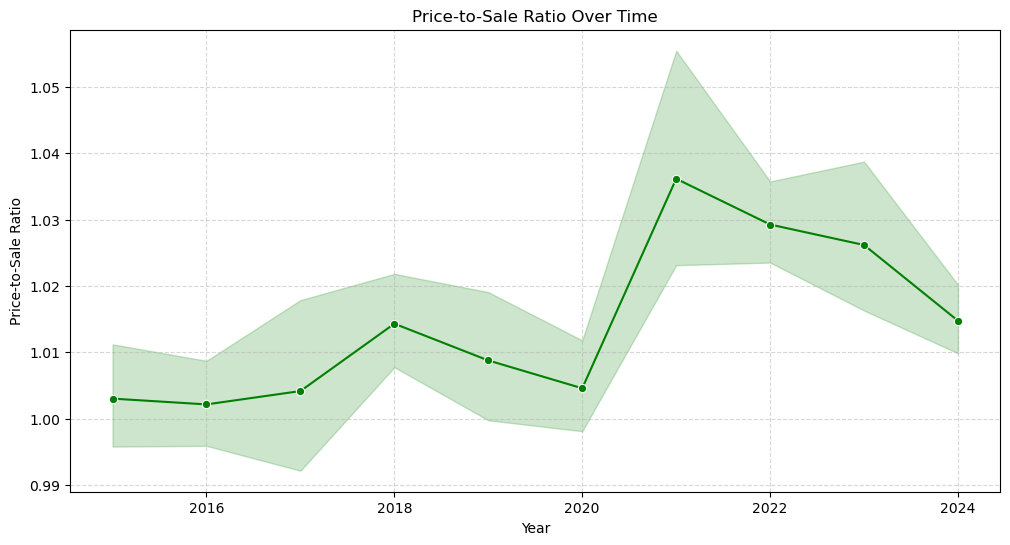

In [49]:
#Showing how covid effected the purchasing power in the housing market

    # Titles and grid
    plt.title("Trends in Purchase Price vs. Rent Cost Over Time")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

    # Display Price-to-Rent Ratio trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data= covid_years_data, x='year', y='price_to_sale_ratio', marker='o', color='green')

    plt.xlabel("Year")
    plt.ylabel("Price-to-Sale Ratio")
    plt.title("Price-to-Sale Ratio Over Time")
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

else:
    print("Error: Required columns ('median_sale_price' or 'median_rent_price') not found in the dataset. Check column names.")